# Data Loading

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
from fastai.metrics import error_rate

In [24]:
bs = 64
THRESH = 0.2

In [5]:
from fastai.imports import *

In [6]:
# Use kaggle api to download stuff

In [9]:
path = Path('/home/jupyter/tutorials/data/quora'); path

PosixPath('/home/jupyter/tutorials/data/quora')

In [10]:
path.ls()

[PosixPath('/home/jupyter/tutorials/data/quora/sample_submission.csv.zip'),
 PosixPath('/home/jupyter/tutorials/data/quora/test.csv.zip'),
 PosixPath('/home/jupyter/tutorials/data/quora/embeddings.zip'),
 PosixPath('/home/jupyter/tutorials/data/quora/train.csv.zip')]

In [53]:
!cd '/home/jupyter/tutorials/data/quora'

In [5]:
# get embeddings and dictionaries

In [13]:
path/'train.csv.zip'

PosixPath('/home/jupyter/tutorials/data/quora/train.csv.zip')

In [12]:
def unzip_file(filepath, zipdir):
    import zipfile
    zip_ref = zipfile.ZipFile(filepath, 'r')
    zip_ref.extractall(zipdir)
    zip_ref.close()


In [15]:
unzip_file(path/'train.csv.zip', path/'train')

In [16]:
unzip_file(path/'test.csv.zip', path/'test')

In [18]:
unzip_file(path/'embeddings.zip', path/'embeddings')

In [19]:
unzip_file(path/'sample_submission.csv.zip', path/'sample_submission')

In [54]:
(path/'train').ls()

[PosixPath('/home/jupyter/tutorials/data/quora/train/train.csv')]

In [57]:
train_df = pd.read_csv(path/'train/train.csv')
train_df.drop(['qid'], axis=1, inplace=True)
#train_df['test'] = 0;
train_df.head()


,question_text,target
0,How did Quebec nationalists see their province...,0
1,"Do you have an adopted dog, how would you enco...",0
2,Why does velocity affect time? Does velocity a...,0
3,How did Otto von Guericke used the Magdeburg h...,0
4,Can I convert montra helicon D to a mountain b...,0


In [58]:
test_df = pd.read_csv(path/'test/test.csv')
# test_df['test'] = 1;
test_df.drop(['qid'], axis=1, inplace=True)
test_df.head()

,question_text
0,Why do so many women become so rude and arroga...
1,When should I apply for RV college of engineer...
2,What is it really like to be a nurse practitio...
3,Who are entrepreneurs?
4,Is education really making good people nowadays?


In [59]:
text_df = (pd.concat([traindf['question_text'], testdf['question_text']])).to_frame()
# textdf.astype({"target": int})
text_df.head()

,question_text
0,How did Quebec nationalists see their province...
1,"Do you have an adopted dog, how would you enco..."
2,Why does velocity affect time? Does velocity a...
3,How did Otto von Guericke used the Magdeburg h...
4,Can I convert montra helicon D to a mountain b...


In [60]:
data_lm = (TextList.from_df(text_df)
            .random_split_by_pct(0.1)
            .label_for_lm()
            .databunch(bs=bs))

In [61]:
data_lm.save('lm1')

In [63]:
data_lm = TextLMDataBunch.load('/home/jupyter/git/fastai-training/', 'lm1', bs=bs)

# Learning

In [64]:
data_lm.show_batch()

idx,text
0,"slowly becoming xxmaj auschwitz , xxmaj dachau or xxmaj xxunk for xxmaj palestinians ? xxbos xxmaj why does xxmaj quora automatically ban conservative opinions when reported , but does not do the same for liberal views ? xxbos xxmaj is it crazy if i wash or wipe my groceries off ? xxmaj germs are everywhere . xxbos xxmaj is there such a thing as dressing moderately , and if so"
1,"line as i would in a xxup rwd supercar ? xxbos xxmaj what political party did you vote for ? xxbos xxmaj how common is it for xxmaj white xxmaj americans to have xxmaj native xxmaj american ancestry ? xxbos xxmaj which is the best place to live near we work xxmaj galaxy , residency road , xxmaj bangalore ? xxbos xxmaj can commerce students do diabetes educator ? xxbos"
2,xxmaj manaphy stubborn ? xxbos xxmaj what is the present scenario of xxup cs at bit xxmaj sindri ? xxbos xxmaj what does almond butter do with your health ? xxbos xxmaj do xxmaj lord xxmaj vishnu and xxmaj lord xxmaj shiva take care of each other 's devotees too ? xxbos xxmaj what should i never crush with a hydraulic press ? xxbos xxmaj can someone teach the art
3,ham football team considered successful ? xxmaj is it among the most popular teams in the xxup uk ? xxbos xxmaj will teenage rebellion become worse with access to so much information ? xxbos xxmaj what are the names of those institution that are willing to finance business worldwide with small interest ? xxbos xxmaj is n't it better to not tell your wife that you 're having an affair
4,"xxbos xxmaj how do you become a better leader ? xxbos xxmaj which kings lived more than 80 years in xxmaj indian history ? xxbos xxmaj where can i download free xxmaj manga in xxup pdf format without installing a program ? xxbos xxmaj in the xxup u.s. , is n't it illegal to require a purchase before someone can enter a contest , as does the one referenced below"


In [65]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.3)

In [66]:
doc(language_model_learner)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


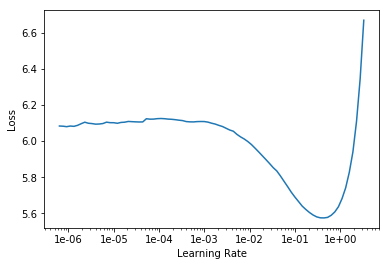

In [67]:
learn.lr_find()
# learn.recorder.plot(skip_end=15)
learn.recorder.plot()

In [70]:
# doc (learn.fit_one_cycle)
#learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn.fit_one_cycle(1, 1e-2)
learn.save('lm-1')

epoch,train_loss,valid_loss,accuracy
1,3.706662,3.567816,0.380593


In [ ]:

learn.load('lm-1');
learn.unfreeze()
# can take more than 3 hours!
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))
learn.save('lm-fine_tuned')

epoch,train_loss,valid_loss,accuracy
1,3.442131,3.396366,0.398765


# Embeddings

In [23]:
acc_02 = partial(accuracy_thresh, thresh=THRESH)
f_score = partial(fbeta, thresh=0.2)

# Learning

In [26]:
# Language model data
data_lm = TextLMDataBunch.from_csv(path, 'text/text.csv')
# Classifier model data
# data_clas = TextClasDataBunch.from_csv(path, 'texts.csv', vocab=data_lm.train_ds.vocab, bs=32)

In [51]:
doc(TextLMDataBunch.from_csv)

In [27]:
data_lm.save()